- 평점 데이터 내의 사용자 정보를 기준으로 정보를 취합하고 현황을 파악한다.
- 사용자 별로 몇편의 영화에 평점을 부여했는지 분포를 파악하라(histogram)
- 사용자의 활동 패턴(활동 기간, 평점 주기 패턴)을 탐색하라(linear chart)
- 사용자의 선호 장르를 파악할 수 있게 시각화 하라(heatmap)

### 수행 방법
- 결측치를 파악후 제거 또는 채운다.
- x축: 사용자 id y축: 영화 평점 편수
- date column을 추가 후 가로축을 시간, 세로축을 평점으로 한 lienar chat를 그린다.
- bar chart, histogram, linear chart, heatmap을 그리는 방법을 파악하고 함수화 한다.

In [2]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
# Util Functions
from enum import Enum

# 파일을 읽어와 pandas의 DataFrame으로 반환해줌
def get_df_from(path: str, sep: str = ','):
    extension = path.split('.')[-1]
    try:
        if extension == "csv" or extension == "txt":
            df = pd.read_csv(path, sep=sep, on_bad_lines='skip')
            if df.empty:
                print("W: DataFrame is empty.")
                return None
            return df
        else:
            print("E: File extension is not supported.")
            return None
    except FileNotFoundError:
        print(f"E: File not found. Check the path: {path}")
        return None
    except pd.errors.ParserError as e:
        print(f"E: Error parsing CSV file: {e}")
        return None
    except Exception as e:
        print(f"E: An unexpected error occured: {e}")
        return None

# 리스트의 평균을 반환.(기본값 0)
def calculate_mean(lst):
    if lst: # 빈 리스트가 아닌 경우에만 평균 계산
        return np.mean(lst)
    return 0 # 빈 리스트인 경우 NaN 반환

# 리스트의 합을 반환.(기본값 0)
def calculate_sum(lst):
    if lst:
        return np.sum(lst)
    return 0


class ChartShape(Enum):
    BAR = 1
    HISTOGRAM = 2
    LINE = 3
    HEATMAP = 4

# Chart 뽑는 함수
def get_chart_from(df: pd.DataFrame, x_col: str, y_col: str, shape: ChartShape = ChartShape.BAR, real_time: bool = False):
    plt.figure(figsize=(10, 6))
    if shape == ChartShape.BAR:
        plt.bar(df[x_col], df[y_col])
    elif shape == ChartShape.HISTOGRAM:
        plt.hist(df[x_col], bins=10)
    elif shape == ChartShape.LINE:
        plt.plot(df[x_col], df[y_col])
    else:
        plt.plot(df[x_col], df[y_col])

    if real_time:
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # 월 단위로 큰 눈금 표시
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # 날짜 형식 지정
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(df[x_col], rotation=45, ha='right')
    plt.show()

def get_chart_from_series(sr: pd.Series, x_col: str, y_col: str, shape: ChartShape = ChartShape.BAR):
    if shape == ChartShape.BAR:
        sr.plot.bar()
    if shape == ChartShape.LINE:
        sr.plot.line()
    if shape == ChartShape.HISTOGRAM:
        sr.plot.hist()
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def get_integer(question: str):
    try:
        id = int(input(question))
        return id
    except:
        print(f"E: invalid integer")
        return 0

In [4]:
# Function

def get_df_strict_from(path: str, sep: str = ','):
    df = get_df_from(path, sep)
    for _ in range(3):
        if df is not None:
            return df
        new_path = input('오류가 발생했습니다. 정확한 경로를 확인해주세요: ')
        new_sep = input('구분자를 입력해주세요: ')
        df = get_df_from(new_path, new_sep)
    exit()

In [5]:
country_path = './kmrd-small/countries.csv'

countries_df = get_df_strict_from(country_path)

countries_value = countries_df.value_counts('country')

countries_value.columns = ['country', 'count']

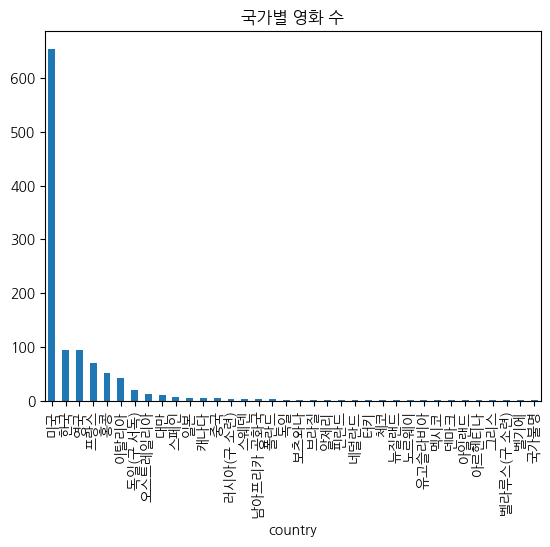

In [6]:
def get_chart_from_series(set: pd.Series, title: str):
    set.plot.bar()
    plt.title(title)
    plt.xticks(rotation=90)

get_chart_from_series(countries_value, '국가별 영화 수')


- 가장 많은 영화에 주연으로 출연한 배우를 찾아라
- 가장 많은 영화에 조연으로 출연한 배우를 찾아라
- 주연으로 출연한 영화(5편 이상 출연)들의 평균 평점이 가장 높은 영화(평점 10개 이상)의 주연배우를 찾아라(상위 3개 영화등 조건을 변경할 수 있게 처리하라)

### 수행 방법

- casting.csv 파일을 열고 주연과 조연으로 df를 나눈다.
- 주, 조연 df를 배우별로 value_count 한다.
- 주연 value_count df를 5편이상의 기준으로 나눈다.
- rates.csv에서 영화별로 groupby한 후 평점이 10개 이상인 친구들만 남긴다. 평균 평점을 매긴다.
- 각 주연배우가 출연한 영화 중 상위 n개의 평균 평점을 매긴다.

In [56]:
castings_path = './kmrd-small/castings.csv'
rates_path = './kmrd-small/rates.csv'
peoples_path = './kmrd-small/peoples.txt'

castings_df = get_df_strict_from(castings_path)
rates_df = get_df_strict_from(rates_path)
peoples_df = get_df_strict_from(peoples_path, sep='\t')

# 주연과 조연 구분
lead_df = castings_df[castings_df['leading'] == 1]
support_df = castings_df[castings_df['leading'] != 1]

print(lead_df.head(3))
print(support_df.head(3))
print(peoples_df.head(3))

   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
   movie  people  order  leading
4  10001   47953      5        0
5  10001   19538      6        0
6  10001   18991      7        0
   people   korean      original
0       5   아담 볼드윈  Adam Baldwin
1       8  애드리안 라인   Adrian Lyne
2       9    에이단 퀸   Aidan Quinn


In [50]:
lead_counts = lead_df.value_counts('people')
support_counts = support_df.value_counts('people')
lead_top = lead_counts.max()
support_top = support_counts.max()
lead_top_person_ids = lead_counts[lead_counts == lead_top]
support_top_person_ids = support_counts[support_counts == support_top]
print(lead_df.value_counts('people').head(3))
print(support_df.value_counts('people').head(3))

print(f"가장 많은 영화에 주연으로 출연한 배우는 {[peoples_df.loc[peoples_df['people'] == id, 'korean'].values[0] for id, _ in list(lead_top_person_ids.items())]}입니다.")
print(f"가장 많은 영화에 조연으로 출연한 배우는 {[peoples_df.loc[peoples_df['people'] == id, 'korean'].values[0] for id, _ in list(support_top_person_ids.items())]}입니다.")

people
1327    16
1843    13
290     11
Name: count, dtype: int64
people
2248     9
7612     7
40425    7
Name: count, dtype: int64
가장 많은 영화에 주연으로 출연한 배우는 ['로버트 드 니로']입니다.
가장 많은 영화에 조연으로 출연한 배우는 ['우마']입니다.


In [95]:
# rates.csv에 평점이 10개 이상인 영화들의 평균 평점을 갖는 pivot_table 제작

mean_rates = rates_df.groupby('movie')['rate'].mean()[rates_df.value_counts('movie') > 10]

lead_over_5 = lead_counts[lead_counts > 5]

people_movie = lead_df.groupby('people')['movie'].apply(list)[lead_counts > 5]

def get_rate_of_movie(id: int):
    return mean_rates.get(id, 0)


people_movie = people_movie.apply(lambda x: [res for id in x if (res := get_rate_of_movie(id)) != 0])

print(people_movie.head())

people
15     [9.18108108108108, 9.197586726998491, 8.950980...
99     [9.284340659340659, 8.463302752293577, 9.21599...
107    [8.452173913043477, 9.256936067551267, 8.55555...
226    [9.341379310344827, 9.462765957446809, 8.94871...
290    [8.342245989304812, 7.5, 8.940217391304348, 8....
Name: movie, dtype: object


In [123]:
def get_top_rate_actor(num: int):
    result = pd.DataFrame(people_movie[people_movie.apply(len) >= num])
    result['top_mean'] = result['movie'].apply(lambda x: np.mean(np.sort(x)[num * -1:]))
    # result['top_mean'] = result['movie'].apply(lambda x: np.mean(np.array(x).argsort()[num * -1:]))
    try: 
        print(peoples_df.loc[peoples_df['people'] == result['top_mean'].idxmax(), 'korean'].values[0])
    except:
        print("만족하는 배우가 없습니다.")
    # print(result['top_mean'])

top_k = get_integer('영화 측정 개수를 입력하시오: ')

get_top_rate_actor(top_k)



로버트 드 니로
